In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-08-07 17:34:21.803264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 17:34:21.803392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 17:34:21.979718: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load images

In [2]:
images_with_mask = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')

In [3]:
images_without_mask = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')

In [4]:
print('Number of images with mask:', len(images_with_mask))
print('Number of images without mask:', len(images_without_mask))

Number of images with mask: 3725
Number of images without mask: 3828


# Create labels for the two categories

images with tumor -> 1

images without tumor ->0

In [5]:
with_mask_labels = [1] * len(images_with_mask)
without_mask_labels = [0] * len(images_without_mask)

In [6]:
labels = with_mask_labels + without_mask_labels

# Display images

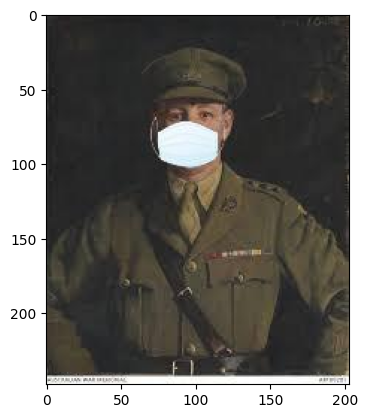

In [7]:
#image with mask
img1 = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1008.jpg')
plt.imshow(img1)
plt.show()

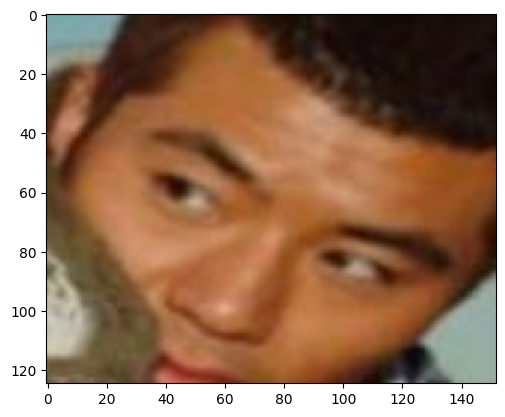

In [8]:
#image without mask
img2 = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1001.jpg')
plt.imshow(img2)
plt.show()

# Image processing

1. Resize the images
2. Convert the images to numpy arrays

In [11]:
with_mask_dir = '/kaggle/input/face-mask-dataset/data/with_mask/'
data = []
for img_file in images_with_mask:
    image = Image.open(with_mask_dir + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_dir = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img_file in images_without_mask:
    image = Image.open(without_mask_dir + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
data[0].shape

(128, 128, 3)

In [13]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [14]:
#convert the image list and labels list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [15]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


# Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
#scale the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


# Build CNN

In [18]:
num_of_classes = 2

model = Sequential()

model.add(Input(shape=(128,128,3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_of_classes, activation='sigmoid'))

In [19]:
#compile the neural network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc']
             )

In [21]:
#train the cnn
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5, batch_size = 40, verbose = 1,validation_data = (X_test_scaled, y_test))

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 498ms/step - acc: 0.9268 - loss: 0.1948 - val_acc: 0.9305 - val_loss: 0.1945
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 81s 493ms/step - acc: 0.9474 - loss: 0.1386 - val_acc: 0.9054 - val_loss: 0.2704
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 496ms/step - acc: 0.9500 - loss: 0.1209 - val_acc: 0.9312 - val_loss: 0.2427
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 74s 490ms/step - acc: 0.9672 - loss: 0.0839 - val_acc: 0.9252 - val_loss: 0.3004
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 83s 496ms/step - acc: 0.9734 - loss: 0.0691 - val_acc: 0.9285 - val_loss: 0.2500


# Model evaluation

In [22]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - acc: 0.9291 - loss: 0.2617
Test accuracy =  0.9285241365432739


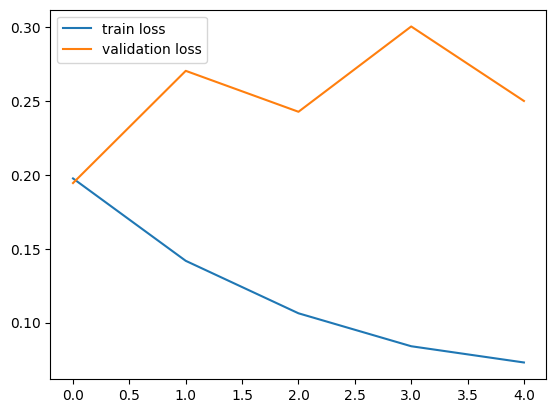

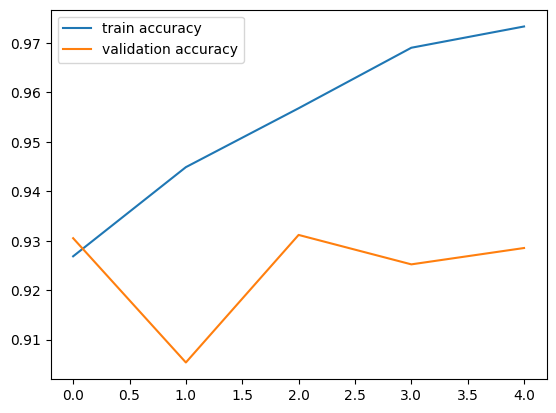

In [23]:
h = history

#plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive system

In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_

if input_pred_label == 1:
    print('The person has tumor')
else
    print('The person doesn't have tumor)